In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

$${dy\over dx} = {v(x,y)\over u(x,y)}$$

$$ {v(x,y)= \zeta * y - \delta * x - f1 * y + f2 * x}$$
$$ {u(x,y)= -\zeta  * y - \delta * x + f1 * x +  f2 * y} $$

$$ V(x,y)= u(x,y)i +v(x,y)j$$

In [2]:
def espiral (Vot=.8,Div=.5,f1=.3,f2=.1):
    # make data    
    x = np.linspace(-5, 5, 11)
    y = np.linspace(-5, 5, 11)

    X, Y = np.meshgrid( x, y )

    U = -Vot*Y - Div*X + f1*X + f2*X
    V = -Div*Y + Vot*X - f1*Y + f2*X

    # plot
    fig, ax = plt.subplots(1,2,figsize=(8,4))

    ax[0].quiver(X, Y, U, V, color="C0", angles='xy', scale_units='xy', scale=2, width=.005)

    ax[1].streamplot(X, Y, U, V)

    plt.show()    

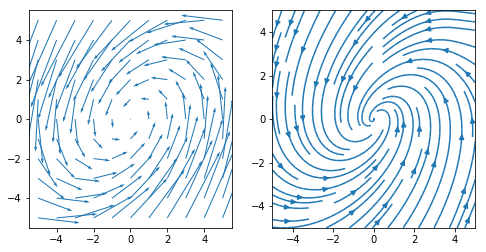

interactive(children=(FloatSlider(value=0.8, description='Vot', max=0.99), FloatSlider(value=0.5, description=…

<function __main__.espiral(Vot=0.8, Div=0.5, f1=0.3, f2=0.1)>

In [3]:
espiral()
interact(espiral,Vot=(0.0,0.99),Div=(0.0,0.99),f1=(0.0,0.99),f2=(0.0,0.99))
